#**Implementation of CLIP**
Please refer to the respective sections in the book for further details.


## **Step 1. Installing libraries and Data loading.**

In [ ]:
pip install transformers

In [ ]:
from PIL import Image
import requests
import os
from transformers import CLIPProcessor, CLIPModel
import pandas as pd
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks")

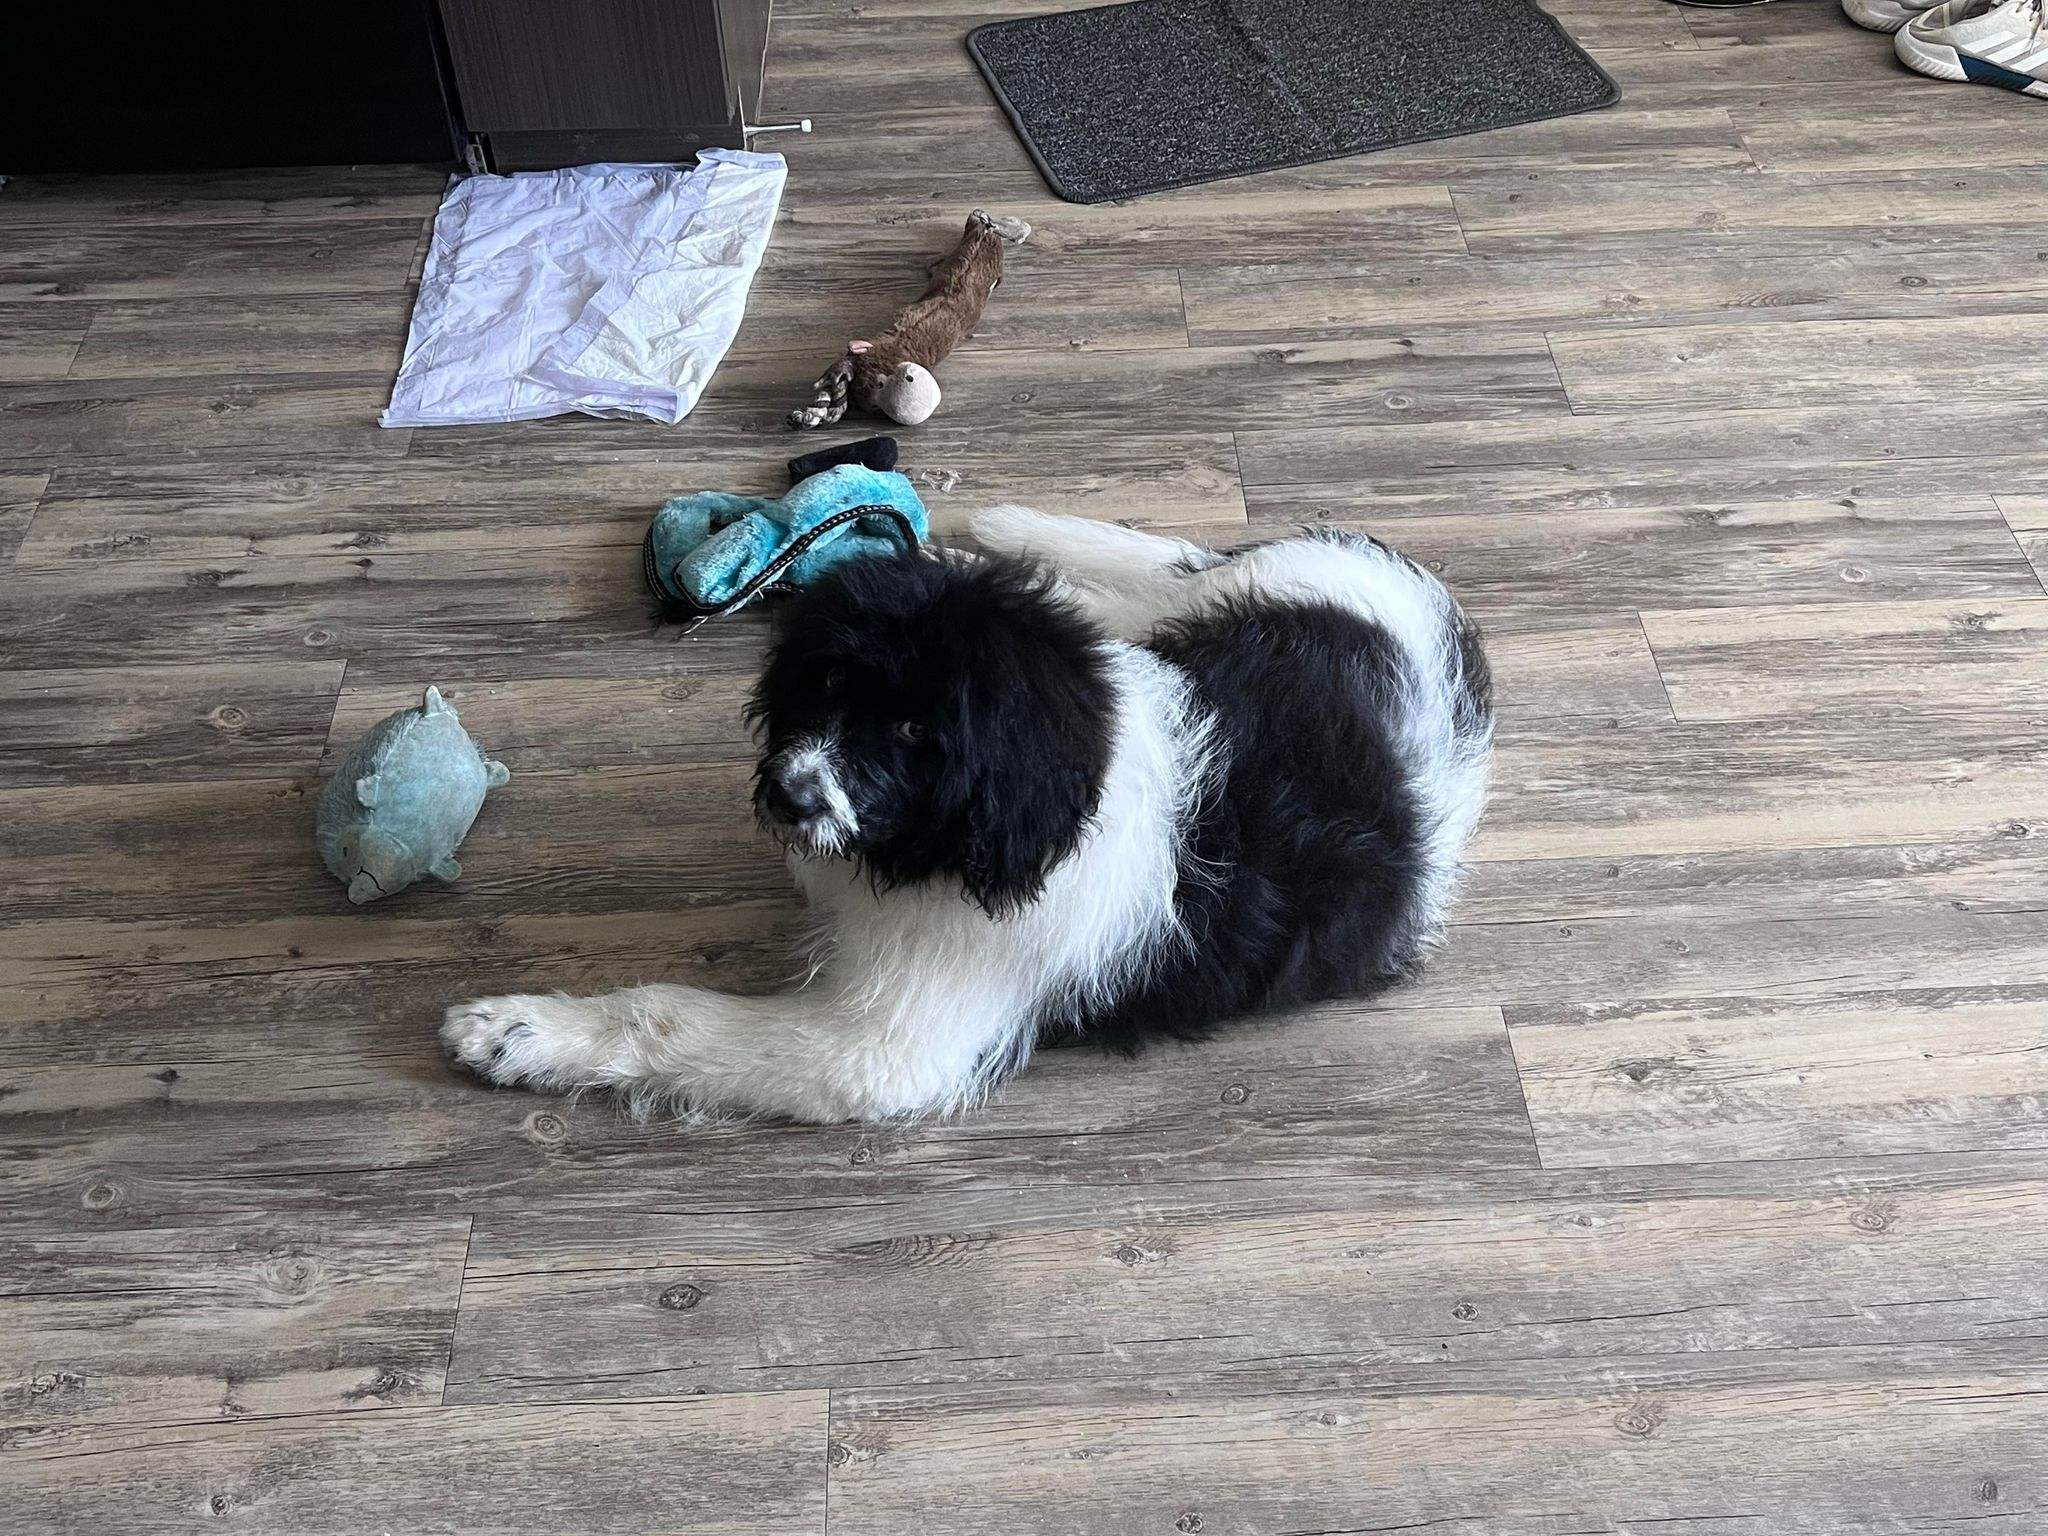

In [ ]:
image_path = 'benali_image.jpg'
image = Image.open(image_path)
Image.open(image_path)

## **Step 2. Data Pre-processing**

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = processor(text=["a photo of a cat", "a photo of a dog with black and white fur", "a photo of a boy" , "baseball field with a lot of people cheering"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

## **Step 3. Model Inference**

In [ ]:
probs_percentage = probs.detach().numpy() * 100

text_inputs = ["a photo of a cat", "a photo of a dog with black and white fur", "a photo of a boy", "baseball field with a lot of people cheering"]

df = pd.DataFrame({
    'text_input': text_inputs,
    'similarity_with_image (%)': probs_percentage[0]
})

print(df)

                                     text_input  similarity_with_image (%)
0                              a photo of a cat                   1.893156
1     a photo of a dog with black and white fur                  62.819950
2                              a photo of a boy                  35.285812
3  baseball field with a lot of people cheering                   0.001074
